## USGS STN Flood Event Data: High Water Marks

The United States Geological Survey (USGS) operates a comprehensive flood event database known as the [Short-Term Network (STN)](https://stn.wim.usgs.gov/stnweb/#/). The STN offers a user-friendly [web front-end](https://stn.wim.usgs.gov/FEV/) for easy access. For developers and scientists, there's a [RESTFul API](https://stn.wim.usgs.gov/STNServices/Documentation/home) available for more advanced queries and integrations. The STN offers access to a variety of data types including instruments, sites, high water marks, and peak summaries.

### Focus: High Water Marks (HWMs)

In this notebook, we'll delve into the specifics of high water marks (HWMs) within the STN database. Here's what you can expect:

1. Data Dictionaries: Understand the structure and meaning of the data.
  
2. Data Retrieval: Learn how to fetch all available data by type.
  
3. Filtered Queries: Dive deeper with specific, filtered data requests.
  
4. Data Limitations: We'll also touch upon some of the known limitations including inconsistent field names and possibility for user introduced errors.

### Additional Resources:

For those interested in the methodology behind HWM collection, the USGS provides detailed resources:
- [Technical Guide on HWMs](https://doi.org/10.3133/tm3A24)
- [High Water Marks & Flooding Overview](https://www.usgs.gov/special-topics/water-science-school/science/high-water-marks-and-flooding)
- [Video Guide: Interpreting High Water Marks](https://www.usgs.gov/media/videos/a-usgs-guide-finding-and-interpreting-high-water-marks)

Let's begin by importing necessary dependencies.

In [1]:
from __future__ import annotations

from pathlib import Path

import matplotlib.lines as mlines
import matplotlib.markers as mmarkers
import matplotlib.pyplot as plt
import pandas as pd

import pygeohydro as gh
from pygeohydro import STNFloodEventData

After importing, we can start with how we can obtain all the HWM data available in the database as a `GeoDataFrame`. We have two options for get STN data: `STNFloodEventData` class or `stn_flood_event` function. The `stn_flood_event` function can only pull either the information dataset about the supported `data_type`s by STN as a `pandas.DataFrame` or a subset of the actual data for the supported STN `data_type`s as a `geopandas.GeoDataFrame`. Moreover, the `STNFloodEventData` class provides access to some other data about the STN service such as data dictionary.

For example, we can get information about HWMS data either using `STNFloodEventData.get_all_data("hwms")` or `gh.stn_flood_event("hwms")`.

In [2]:
hwm_all = STNFloodEventData.get_all_data(
    "hwms", as_list=False, async_retriever_kwargs={"disable": True, "max_workers": 6}
)
hwm_all.head()

,hwm_id,waterbody,site_id,event_id,hwm_type_id,hwm_quality_id,hwm_locationdescription,latitude_dd,longitude_dd,survey_date,...,survey_member_id,hwm_label,files,stillwater,peak_summary_id,last_updated,last_updated_by,uncertainty,hwm_uncertainty,geometry
0,13922,Swatara Creek,16106,123,1,1,HWM is located on inside of pavillion two,40.192896,-76.723080,2012-04-26T04:00:00,...,202.0,no_label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.72308 40.19290)
1,17897,Atlantic Ocean,19148,24,1,3,Mud line on bench rocks and plants near IBA Cl...,41.894148,-70.536629,2017-06-05T04:00:00,...,2.0,HWMMAPLY-402,NaN,0.0,NaN,NaN,NaN,NaN,NaN,POINT (-70.53663 41.89415)
2,19685,East Nishnabotna River,20005,168,5,6,"U.S. Highway 34, seed line on flood wall (1 of...",41.026290,-95.243199,1998-07-28T05:00:00,...,1757.0,HWM U/S,NaN,1.0,3337.0,NaN,NaN,NaN,NaN,POINT (-95.24320 41.02629)
3,18530,Maquoketa River,19436,151,6,1,"County Road X29/220th Avenue, southwest of Del...",42.410092,-91.363481,2010-07-30T05:00:00,...,1755.0,USGS HWM D/S,NaN,1.0,2710.0,NaN,NaN,NaN,NaN,POINT (-91.36348 42.41009)
4,19687,East Nishnabotna River,20005,168,2,6,"U.S. Highway 34, debris line on guardrail (2 o...",41.026290,-95.243199,1998-07-28T05:00:00,...,1757.0,HWM U/S,NaN,1.0,3337.0,NaN,NaN,NaN,NaN,POINT (-95.24320 41.02629)


In [3]:
hwm_all = gh.stn_flood_event("hwms")

In [4]:
print(f"There are {len(hwm_all)} HWMs in the database.")

There are 34722 HWMs in the database.


For an interactive map, we can use the explore method. There are at least 34,000 HWMs in the STN database scattered throughout the country. It's important to note the possibility of outliers as this data is collected by people and liable to errors. Here, we plot a sample of 1000 HWMs.

In [5]:
hwm_all.sample(1000).explore(
    marker_kwds={"radius": 2},
    style_kwds={"stroke": False},
)

Next, we illustrate how a filtered query can be completed with the same HWM data. First we want to present what parameters are available to query. We can use the `STNFloodEventData.hwms_query_params` attribute for that.

In [6]:
STNFloodEventData.hwms_query_params

{'County',
 'EndDate',
 'Event',
 'EventStatus',
 'EventType',
 'StartDate',
 'States'}

We can a subset of HWMS data either using `STNFloodEventData.get_filtered_data("hwms", query_params=query_params)` or `gh.stn_flood_event("hwms", query_params=query_params)`.

In [7]:
hwm_filtered = STNFloodEventData.get_filtered_data(
    "hwms",
    crs="ESRI:102003",
    async_retriever_kwargs={"disable": True},
    query_params={"States": "SC,NC"},
)
hwm_filtered.head()

,latitude,longitude,eventName,hwmTypeName,hwmQualityName,verticalDatumName,verticalMethodName,approvalMember,markerName,horizontalMethodName,...,hdatum_id,flag_member_id,survey_member_id,uncertainty,hwm_label,files,height_above_gnd,hwm_uncertainty,peak_summary_id,geometry
0,33.681111,-78.891667,2017 Irma,Seed line,Good: +/- 0.10 ft,NAVD88,Tape measure,Matt Petkewich,Marker,RT-GNSS,...,2,1381.0,1381.0,0.02,HWM,NaN,NaN,NaN,NaN,POINT (1566648.913 -286040.618)
1,33.681111,-78.891667,2020 Isaias,Mud,Good: +/- 0.10 ft,NAVD88,RT-GNSS,Andy Caldwell,Marker,Phone/Car GPS,...,2,1381.0,1381.0,0.02,HWM1,NaN,3.0,0.1,NaN,POINT (1566648.913 -286040.618)
2,33.681111,-78.891667,2020 Isaias,Mud,Good: +/- 0.10 ft,NAVD88,RT-GNSS,Andy Caldwell,Marker,Phone/Car GPS,...,2,1381.0,1381.0,0.02,HWM2,NaN,3.0,0.1,NaN,POINT (1566648.913 -286040.618)
3,35.281051,-76.662585,2011 Irene,Seed line,Excellent: +/- 0.05 ft,NAVD88,,,,Map (digital or paper),...,2,36.0,NaN,NaN,no_label,NaN,NaN,NaN,NaN,POINT (1731958.461 -71714.640)
4,34.311221,-77.733077,2018 Florence,Debris,Poor: +/- 0.40 ft,NAVD88,RT-GNSS,Steve Harden,Stake,Map (digital or paper),...,2,761.0,1919.0,0.06,HWM-01,NaN,0.0,NaN,NaN,POINT (1658023.273 -197179.233)


The first step involves retrieving the data dictionary for HWMs. We can use the `as_dict` argument to return the data as a dictionary but will prefer the default GeoDataFrame for this example. We can also pass keyword arguments to the async retriever as shown here where the caching is disabled.

In [8]:
hwm_dd = STNFloodEventData.data_dictionary(
    "hwms", as_dict=False, async_retriever_kwargs={"disable": True}
)
hwm_dd.head()

,Field,Definition
0,latitude_dd,Horizontal location of HWM in decimal degrees ...
1,latitude,repeat of latitude_dd
2,longitude,repeat of longitude_dd
3,eventName,Event name
4,hwmTypeName,Type of HWM evience. See hwm_type_id for curr...


It's important to note that the schemas for the three requests: all data, filtered data, and data dictionaries don't necessarily agree. 

In [9]:
# compares the columns
print(
    f"Do the columns have the same length?: {set(hwm_all.columns) == set(hwm_filtered.columns) == set(hwm_dd.columns)}"
)

# compare columns
pd.concat(
    [
        pd.Series(hwm_all.columns, name="All HWM Fields"),
        pd.Series(hwm_filtered.columns, name="Filtered HWM Fields"),
        pd.Series(hwm_dd["Field"], name="HWM Data Dictionary Fields"),
    ],
    axis=1,
).head()

Do the columns have the same length?: False


,All HWM Fields,Filtered HWM Fields,HWM Data Dictionary Fields
0,hwm_id,latitude,latitude_dd
1,waterbody,longitude,latitude
2,site_id,eventName,longitude
3,event_id,hwmTypeName,eventName
4,hwm_type_id,hwmQualityName,hwmTypeName


While many of the differences can be inferred, some of the discrepancies could lead to columns with ambiguous information. The USGS is working on an updated RESTFul API that should address this. These differences are available for the other data types, "instruments", "peaks", and "sites", as well.

Now we will plot some of the HWMs. First we retrieve some state lines and project those as well as the filtered HWMs to the 'EPSG:4329' CRS.

In [10]:
carolina_lines = gh.get_us_states(["NC", "SC"]).to_crs("EPSG:4329")
hwm_filtered = hwm_filtered.to_crs("EPSG:4329")

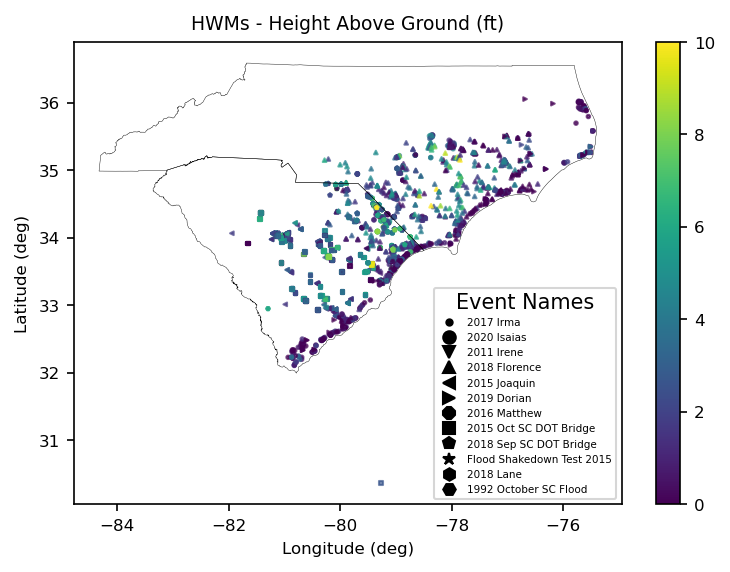

In [11]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)

event_names = hwm_filtered.loc[:, "eventName"].unique()
markers = dict(zip(event_names, mmarkers.MarkerStyle.filled_markers[: len(event_names)]))

ax.set_title("HWMs - Height Above Ground (ft)", fontsize=9)
ax.set_xlabel("Longitude (deg)", fontsize=8)
ax.set_ylabel("Latitude (deg)", fontsize=8)

ax.tick_params(axis="both", which="major", labelsize=8)

vmin, vmax = (
    hwm_filtered.loc[:, "height_above_gnd"].min(),
    hwm_filtered.loc[:, "height_above_gnd"].max(),
)

legend = True
for i, (event_name, data) in enumerate(hwm_filtered.groupby("eventName")):
    if i == 1:
        legend = False

    data.plot(
        ax=ax,
        column="height_above_gnd",
        alpha=0.7,
        legend=legend,
        markersize=3,
        marker=markers[event_name],
        vmin=0,
        vmax=10,
    )

# Create a list of Line2D objects to use for the legend
legend_elements = [
    mlines.Line2D([0], [0], color="black", marker=markers[event_name], linestyle="None")
    for event_name in event_names
]

# Add the legend to the plot
ax.legend(
    legend_elements,
    event_names,
    loc="lower right",
    title="Event Names",
    bbox_to_anchor=(1, 0),
    prop={"size": 5},
)

colorbar = plt.gcf().get_axes()[-1]
colorbar.tick_params(labelsize=8)

carolina_lines.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.2)
fig.savefig(Path("_static", "hmws.png"), bbox_inches="tight", dpi=150)

### Data Quality Issues

Inspecting the figure above reveals a HWM in the Atlantic Ocean. Trying to pick that one out, we get the following information about the outlier. We only display a few of the fields that may contain the problem.

In [12]:
outlier = hwm_filtered.loc[hwm_filtered.latitude < 31, :].squeeze()
print(
    outlier.loc[
        [
            "siteDescription",
            "waterbody",
            "stateName",
            "countyName",
            "latitude_dd",
            "longitude_dd",
            "site_latitude",
            "site_longitude",
            "height_above_gnd",
        ]
    ]
)

siteDescription     US Route 17 crossing of the Pee Dee and Waccam...
waterbody                                    Pee Dee / Waccamaw River
stateName                                                          SC
countyName                                          Georgetown County
latitude_dd                                                  30.36694
longitude_dd                                                -79.26778
site_latitude                                               33.365582
site_longitude                                              -79.25334
height_above_gnd                                                 2.68
Name: 1127, dtype: object


Inspecting the fields above reveals that this potential outlier should be in Georgetown County which is on the coast of South Carolina just south of Myrtle Beach. Additionally, the fields show two different entries for latitude and longitudes. We look at the definitions for latitudes below.

In [13]:
print(
    f"'site_latitude' : {hwm_dd.loc[hwm_dd.loc[:,'Field'] == 'site_latitude','Definition'].iloc[0]}"
)
print(f"'latitude_dd' : {hwm_dd.loc[hwm_dd.loc[:,'Field'] == 'latitude_dd','Definition'].iloc[0]}")

'site_latitude' : Horizontal location of Site of common water surface (not location of HWM)
'latitude_dd' : Horizontal location of HWM in decimal degrees (not location of associated site)


From this, we can say that the 'site_latitude' field reveals horizontal locations of the common water surface while the 'latitude_dd' field refers to that of the HWM. This distinction indicates why these two fields are expected to differ. Nevertheless, the location of the HWM all but impossibly collected so far from the Pee Dee and Waccamaw Rivers. It's likely that this was a typo. It's important to note that this service is fed by data by real people who are liable to make simple mistakes. It's advised to take a look at your data and inspect for any inconsistencies prior to using for analysis.